### <span style="color:GoldenRod ">**MediBuddy Insurance Data Analysis**</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### <span style="color:Aquamarine ">**Load and read the datasets**</span> 

In [2]:
df1 = pd.read_excel(r"F:\Internships\Labmentix\Project 2\Python\drive-download-20250126T150528Z-001\Medibuddy personal details.xlsx")
df2 = pd.read_excel(r"F:\Internships\Labmentix\Project 2\Python\drive-download-20250126T150528Z-001\Medibuddy Price data.xlsx")


In [3]:
df = pd.merge(df1, df2, on='Policy no.', how='inner')
df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.400,1826.84300
1,PLC157033,1,no,southwest,19,male,24.600,1837.23700
2,PLC157060,0,no,southwest,56,male,40.300,10602.38500
3,PLC157087,1,no,southwest,30,female,32.400,4149.73600
4,PLC157186,5,no,southwest,19,female,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,northeast,39,male,29.925,22462.04375
1334,PLC168436,0,yes,northeast,18,female,21.660,14283.45940
1335,PLC168634,2,yes,northeast,42,male,24.605,21259.37795
1336,PLC168652,0,yes,northeast,29,female,21.850,16115.30450


#### <span style="color:Aquamarine ">**Data Cleaning**</span>

In [4]:
df.isnull().sum()

Policy no.        0
children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [ ]:
df.describe()

,children,age,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.094918,39.207025,30.663397,13270.422265
std,1.205493,14.049960,6.098187,12110.011237
min,0.000000,18.000000,15.960000,1121.873900
25%,0.000000,27.000000,26.296250,4740.287150
50%,1.000000,39.000000,30.400000,9382.033000
75%,2.000000,51.000000,34.693750,16639.912515
max,5.000000,64.000000,53.130000,63770.428010


#### <span style="color:Aquamarine ">**Exploratory Data Analysis**</span>

#### **Gender Based Analysis**
- Does gender matter in policy extension?

In [8]:
# Compare average charges per gender
gender_avg = df.groupby('sex')['charges in INR'].agg('mean')
gender_avg



sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64

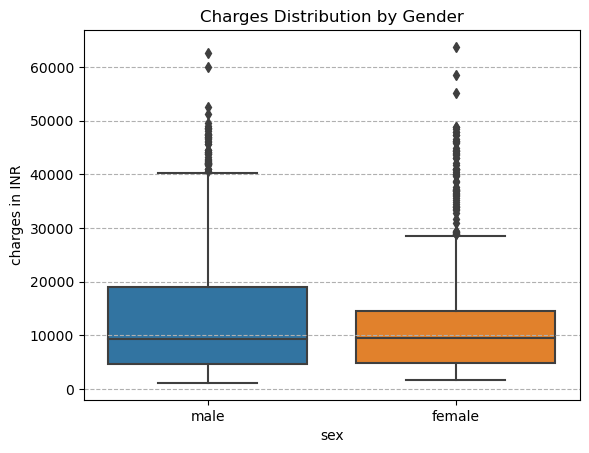

In [9]:
# visualize the distribution
sns.boxplot(x='sex', y='charges in INR', data=df)
plt.title("Charges Distribution by Gender")
plt.grid(axis='y', linestyle='--')
plt.show()

In [10]:
# Perform Statistical Test
from scipy.stats import ttest_ind

male_charges = df[df['sex'] == 'male']['charges in INR']
female_charges = df[df['sex'] == 'female']['charges in INR']

t_statistics, p_value = ttest_ind(male_charges, female_charges, equal_var=False)
print(f"T-Statistics results: {t_statistics}, p-value: {p_value}")

T-Statistics results: 2.100887823235954, p-value: 0.03584101495601688


#### Here p-value < 0.05, gender has a significant effect.
- Does Gender Matter for Extending Policies?
- Since there is a statistically significant difference in policy costs based on gender, the company might consider gender as a factor when designing or extending policies.

#### **Average Amount Spent on Each Policy**

In [11]:
average_policy_cost = df["charges in INR"].mean()
print(f"Average Policy Cost: {average_policy_cost:.2f} INR")

Average Policy Cost: 13270.42 INR


#### **Regional Analysis**
- Should the company offer location-based policies?

In [12]:
# Average charges per region

region_avg = df.groupby('region')['charges in INR'].mean()
print(region_avg)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges in INR, dtype: float64


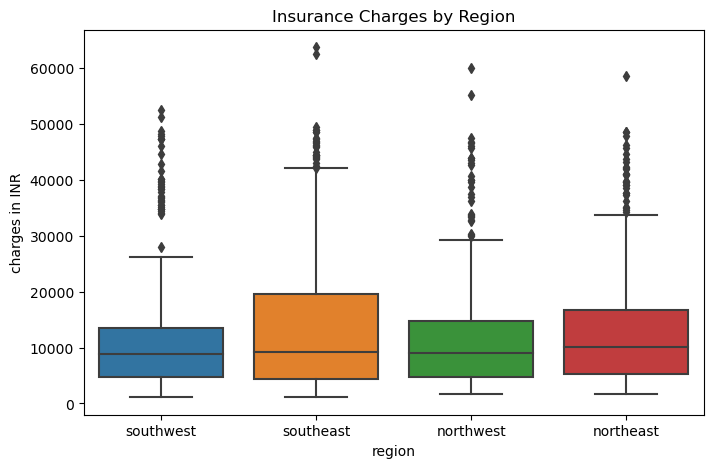

In [13]:
# Visualize regional distribution
plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges in INR', data=df)
plt.title("Insurance Charges by Region")
plt.show()

- The visual differences in medians, IQRs, and the presence of outliers suggest that geographic location might be a relevant factor in determining insurance charges.

#### **Dependents and Claims**
- Does the number of dependents affect the claimed amount?

In [14]:
# Charges per dependants
children_avg = df.groupby('children')['charges in INR'].mean()
children_avg

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges in INR, dtype: float64

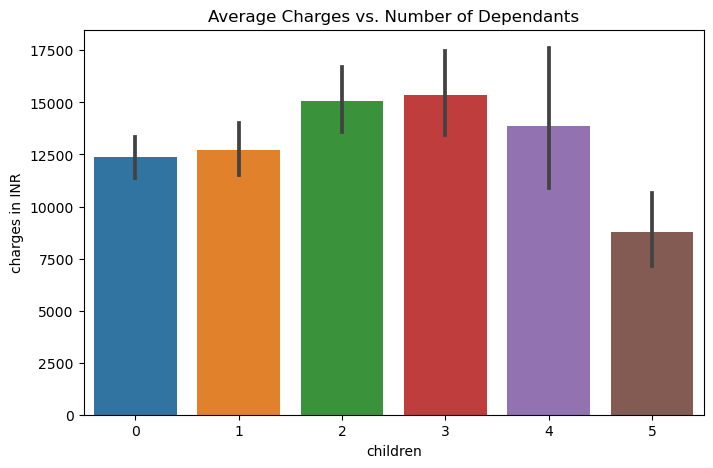

In [15]:
# Visualize the trend
plt.figure(figsize=(8,5))
sns.barplot(x='children', y='charges in INR', data=df)
plt.title('Average Charges vs. Number of Dependants')
plt.show()

In [16]:
# Correlation check
correlation = df['children'].corr(df['charges in INR'])
print(f"Correlation between Children and Charges are: {correlation:.2f}")

Correlation between Children and Charges are: 0.07


- This shows a weak positive correlation of 0.07. 
- The number of children, by itself, is unlikely to be a major factor in determining insurance charges.

#### **BMI and Insurance Costs**
- Does BMI help predict insurance claims?

In [17]:
# Correlation between BMI and Charges
correlation_bmi = df['bmi'].corr(df['charges in INR'])
print(f"Correlation between BMI and Charges are : {correlation_bmi:.2f}")

Correlation between BMI and Charges are : 0.20


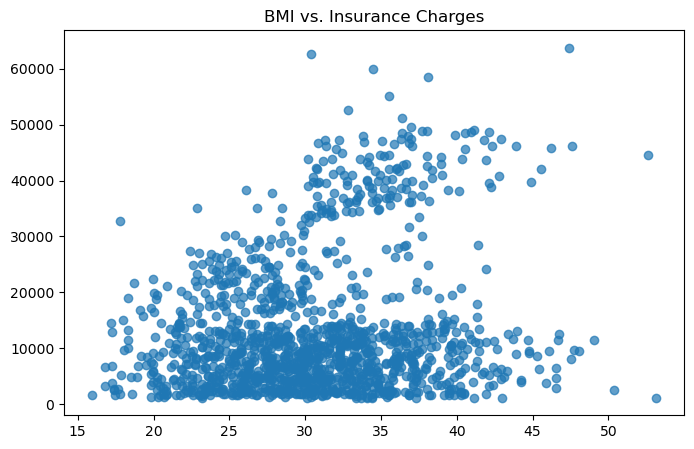

In [18]:
# Visualize the trend
plt.figure(figsize=(8,5))
plt.scatter(x='bmi', y='charges in INR', data=df, alpha=0.7)
plt.title('BMI vs. Insurance Charges')
plt.show()

- This shows a weak positive correlation of 0.20. 
- The relationship between BMI and charges is not negligible, but it's not a dominant factor either.  While higher BMI is associated with somewhat higher charges, it's not a strong predictor on its own.

#### **Smoking Status Impact**
- Does being a smoker increase policy charges?

In [19]:
# Average charges for smokers 

smokers_avg = df.groupby('smoker')['charges in INR'].mean()
smokers_avg

smoker
no      8434.268298
yes    32050.231832
Name: charges in INR, dtype: float64

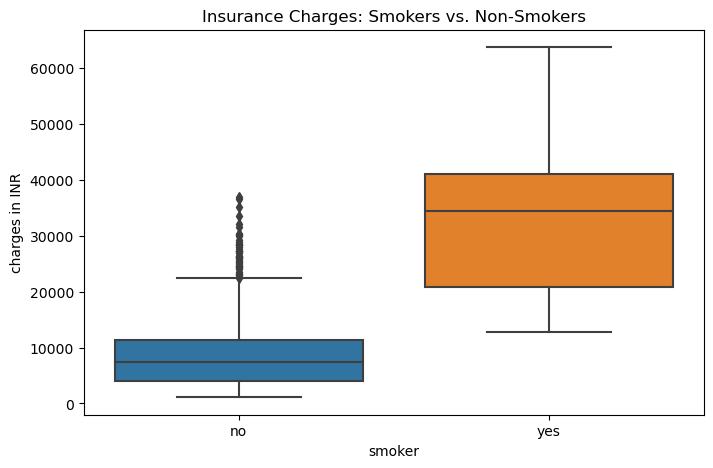

In [20]:
# Compaer average Insurance charges for smokers vs non-smokers

plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges in INR', data=df)
plt.title('Insurance Charges: Smokers vs. Non-Smokers')
plt.show()

In [21]:
# Statistical test
smoker_charges = df[df['smoker']=='yes']['charges in INR']
non_smoker_charges = df[df['smoker']=='no']['charges in INR']
t_statistics, p_value = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var=False)

print(f"T-Statistics Results: {t_statistics}, P-value: {p_value}")

T-Statistics Results: 32.75188776634184, P-value: 5.889464446716309e-103


- Highly Significant Difference: Your results provide extremely strong evidence that there is a statistically significant difference in insurance charges between smokers and non-smokers. The large t-statistic and the extremely small p-value leave virtually no doubt about this.

- Smokers Pay More: Given the positive t-statistic and the context of insurance, it's safe to conclude that smokers, on average, have significantly higher insurance charges than non-smokers.

#### **Age and Insurance Claims**
- Does age affect claims?

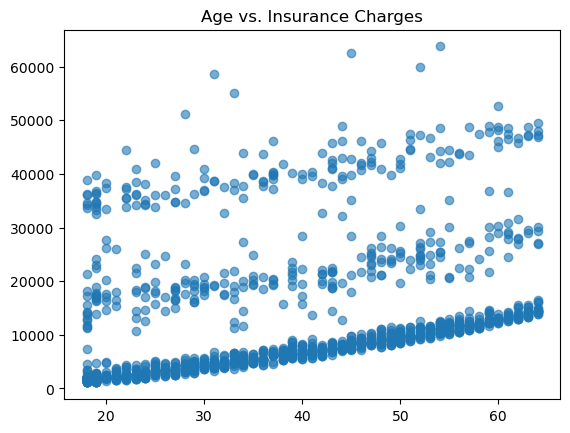

In [27]:
# Visualizing the trend

plt.scatter(x='age', y='charges in INR', data=df, alpha=0.6)
plt.title('Age vs. Insurance Charges')
plt.show()

In [23]:
# Correlation between age and charges
correlation_age = df['age'].corr(df['charges in INR'])
print(f"Correlation between Age and Charges :{correlation_age:.2f}")

Correlation between Age and Charges :0.30


- This shows a moderate positive correlation of 0.30. 
- Age is a more relevant factor in predicting insurance costs.

#### **BMI-Based Discounts**
- Can BMI be used for discounts

In [24]:
# Categorizing BMI 
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
    
df['bmi_category'] = df['bmi'].apply(bmi_category)
df.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,bmi_category
0,PLC157006,0,no,southwest,23,male,34.4,1826.843,Obese
1,PLC157033,1,no,southwest,19,male,24.6,1837.237,Normal
2,PLC157060,0,no,southwest,56,male,40.3,10602.385,Obese
3,PLC157087,1,no,southwest,30,female,32.4,4149.736,Obese
4,PLC157186,5,no,southwest,19,female,28.6,4687.797,Overweight


In [25]:
# Average charges by BMI Category

bmi_avg = df.groupby('bmi_category')['charges in INR'].mean()
print(bmi_avg)

bmi_category
Normal         10409.337709
Obese          15552.335469
Overweight     10987.509891
Underweight     8852.200585
Name: charges in INR, dtype: float64


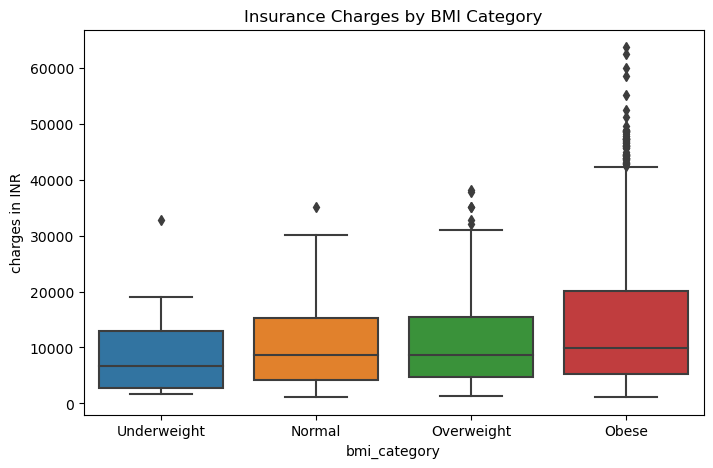

In [26]:
# Visulaization

plt.figure(figsize=(8,5))
sns.boxplot(x='bmi_category', y='charges in INR', data=df, order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Insurance Charges by BMI Category')
plt.show()

- As observed Normal BMI individuals have lower charges, the company could offer certain discounts here